# Create Targets

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("../data/train.csv", nrows=10000)

In [4]:
train_df.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


## Regression targets

### resp

**Type**: $resp$

In [15]:
train_df["resp"].describe()

count    10000.000000
mean         0.000562
std          0.031490
min         -0.217967
25%         -0.011974
50%          0.000125
75%          0.012136
max          0.180969
Name: resp, dtype: float64

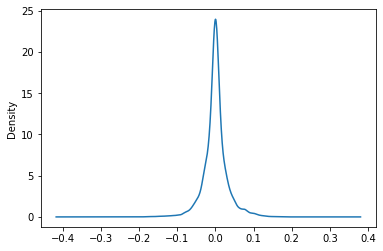

In [14]:
train_df["resp"].plot.kde();

### ln(resp+1)

**Type**: $log(resp+1)$

In [23]:
train_df["log_resp_target"] = np.log(train_df.resp+1)

In [21]:
train_df["log_resp_target"].describe()

count    10000.000000
mean         0.000065
std          0.031577
min         -0.245858
25%         -0.012046
50%          0.000125
75%          0.012063
max          0.166336
Name: log_resp_target, dtype: float64

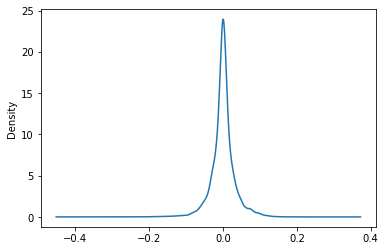

In [17]:
train_df["log_resp_target"].plot.kde();

### weights * resp

In [28]:
train_df["weight_resp_target"] = train_df["weight"]*train_df["resp"]

In [31]:
train_df["weight_resp_target"].describe()

count    10000.000000
mean        -0.000074
std          0.111145
min         -3.947029
25%         -0.005600
50%          0.000000
75%          0.006132
max          2.667318
Name: weight_resp_target, dtype: float64

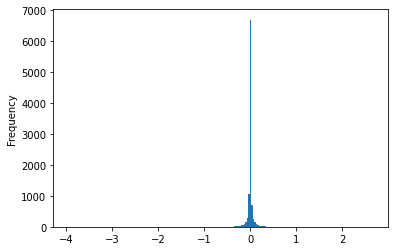

In [38]:
train_df["weight_resp_target"].plot.hist(bins=200);

### resp, resp_1, resp_2, resp_3, resp_4

**Idea:**

* Train separate regression models with every resp_{1,4} and resp and make an ensemble

In [42]:
train_df[["date", "resp", "resp_1", "resp_2", "resp_3", "resp_4"]]

,date,resp,resp_1,resp_2,resp_3,resp_4
0,0,0.006270,0.009916,0.014079,0.008773,0.001390
1,0,-0.009792,-0.002828,-0.003226,-0.007319,-0.011114
2,0,0.023970,0.025134,0.027607,0.033406,0.034380
3,0,-0.003200,-0.004730,-0.003273,-0.000461,-0.000476
4,0,-0.002604,0.001252,0.002165,-0.001215,-0.006219
...,...,...,...,...,...,...
9995,1,0.051909,0.001847,0.016171,0.039813,0.061120
9996,1,-0.019537,-0.000712,-0.004864,-0.009795,-0.018601
9997,1,0.009608,0.002383,0.004190,0.002356,0.006833
9998,1,-0.065972,-0.003532,-0.037491,-0.053815,-0.052844


## Classification targets

### Binary target

**Type:** $resp > 0$

In [7]:
train_df["binary_target"] = np.where(train_df.resp>0, 1, 0)

In [10]:
train_df[["ts_id", "date", "weight", "feature_1", "resp", "binary_target"]].head(9)

,ts_id,date,weight,feature_1,resp,binary_target
0,0,0,0.000000,-1.872746,0.006270,1
1,1,0,16.673515,-1.349537,-0.009792,0
2,2,0,0.000000,0.812780,0.023970,1
3,3,0,0.000000,1.174378,-0.003200,0
4,4,0,0.138531,-3.172026,-0.002604,0
5,5,0,0.000000,-1.499681,0.001282,1
6,6,0,0.190575,-3.172026,0.000709,1
7,7,0,3.820844,0.446050,0.033473,1
8,8,0,0.116557,-3.172026,-0.001677,0


### Binary